### Random Forest Predictive Analysis 

Note that in other notebooks, we only correlated the sets of metrics and evaluation 
performance. One of the issues with this approach is that the confounding variable is the 
training time-step and so this analysis is a bit empty. 

Another idea is to try to study how predictive each of the features is for a model's evaluation 
performance. 

The main idea is to study what training aspects are indicative of the model changing how it 
performs. 

In [2]:
from collections import defaultdict
from sklearn import tree
from collections import defaultdict

import matplotlib.pyplot as plt
from utils import sort_and_filter_metrics, METRICS, MODEL_SIZES, get_checkpoint_evals, LIMITED_EVAL_METRICS

import pickle 

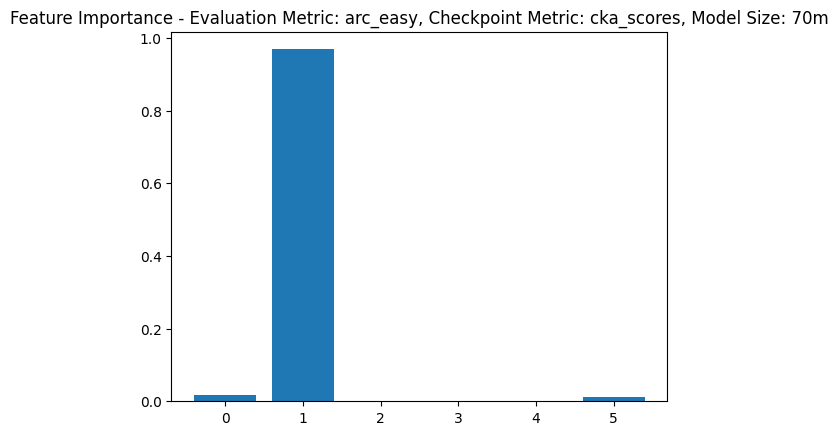

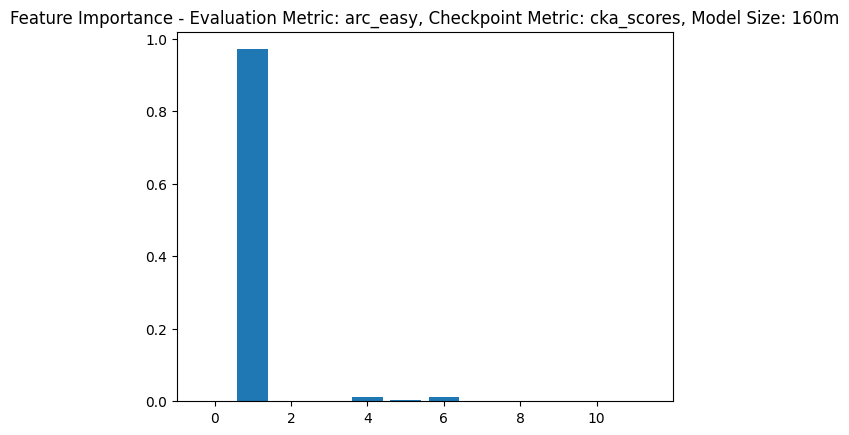

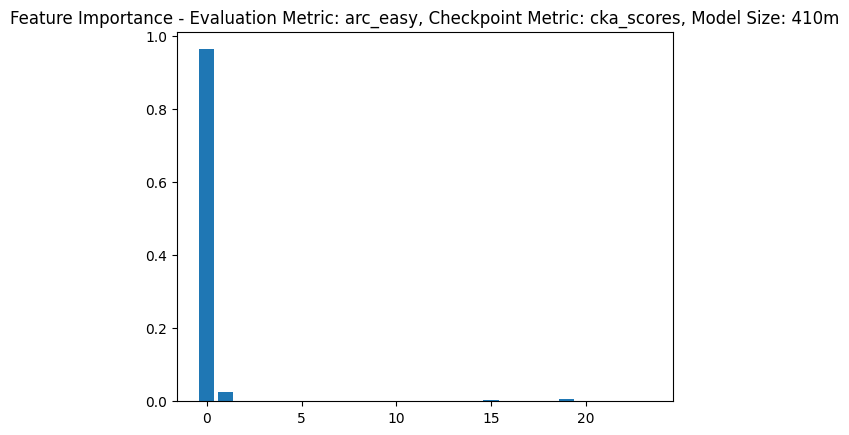

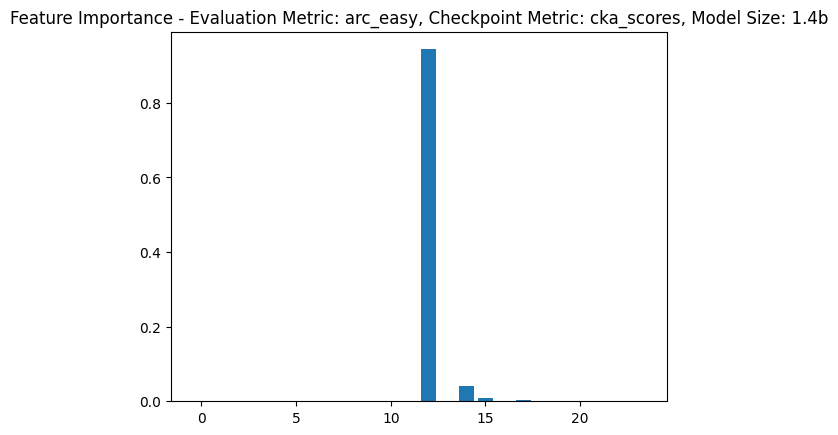

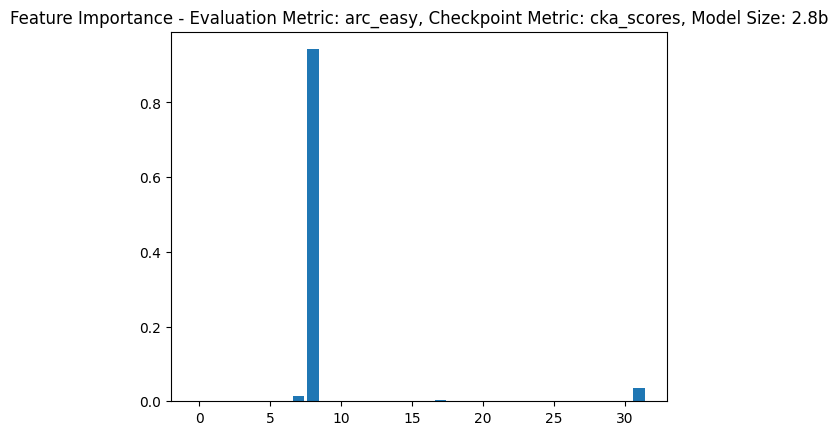

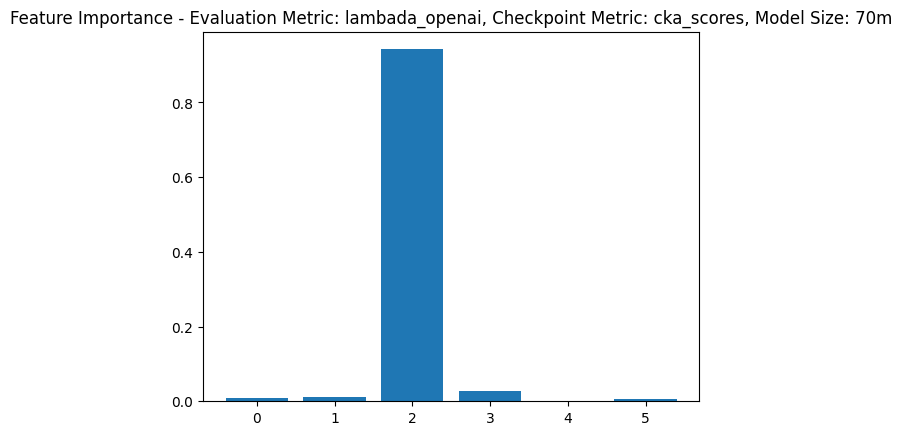

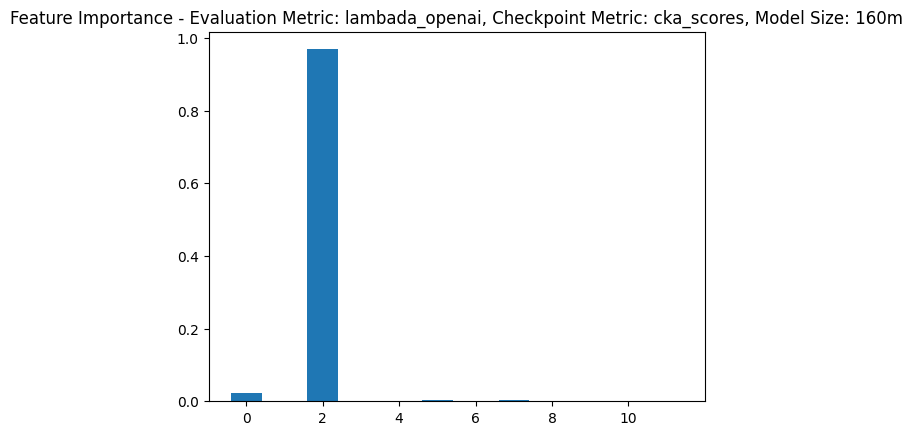

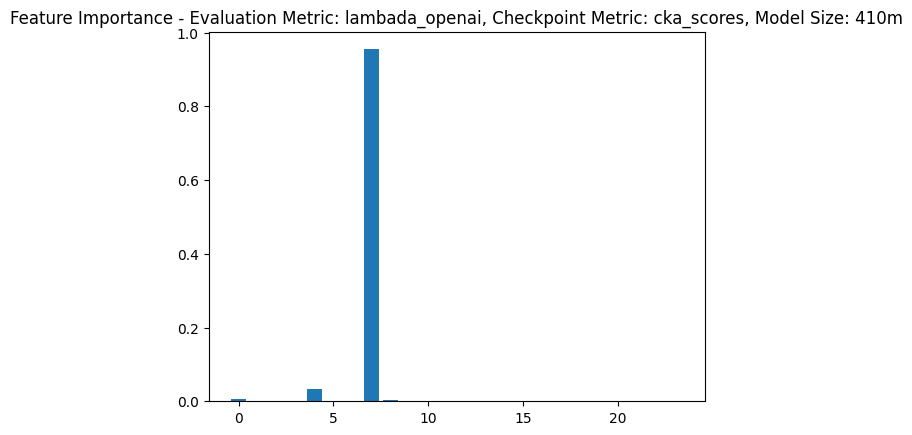

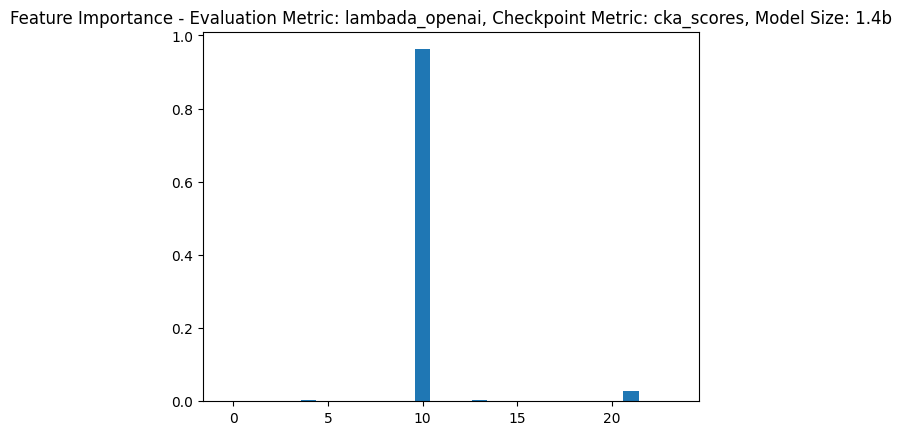

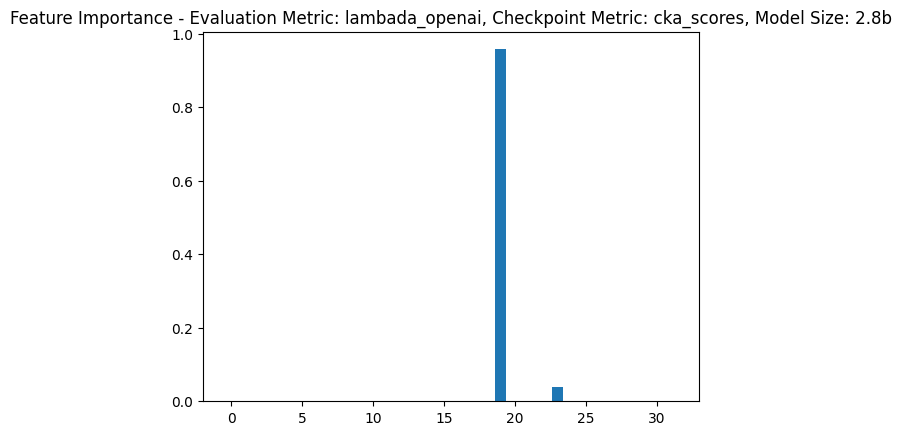

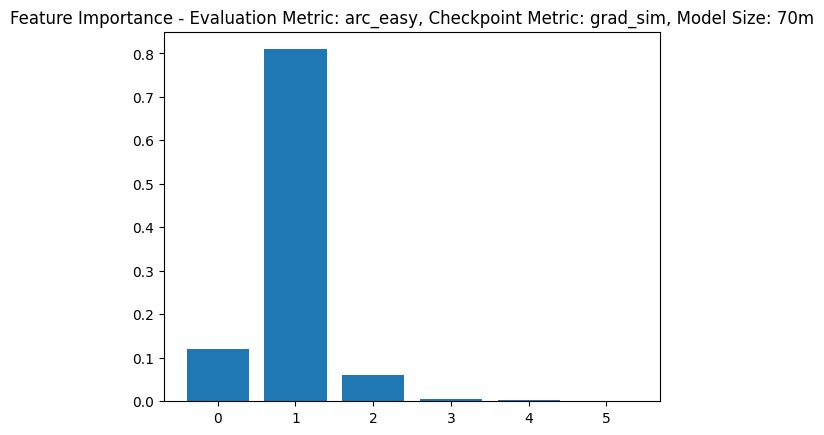

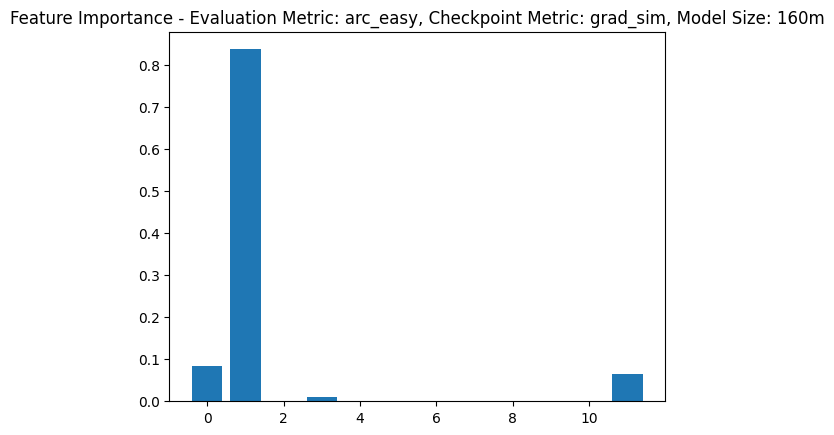

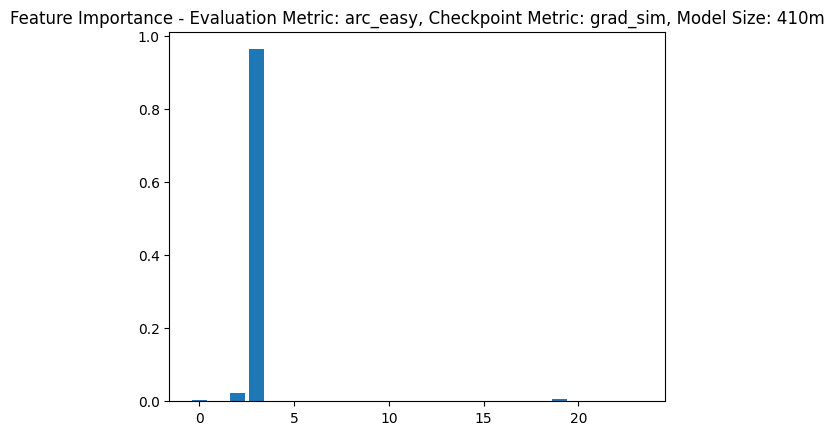

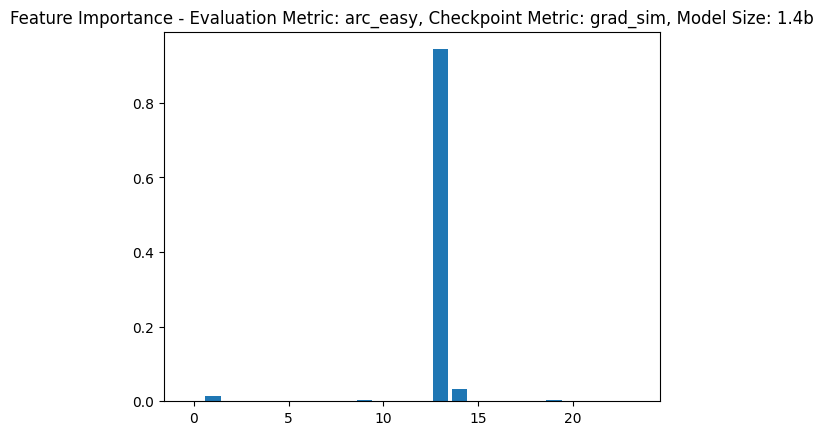

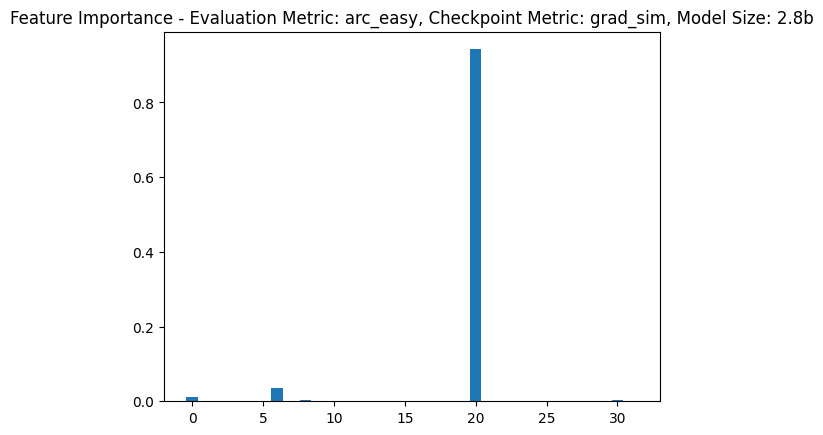

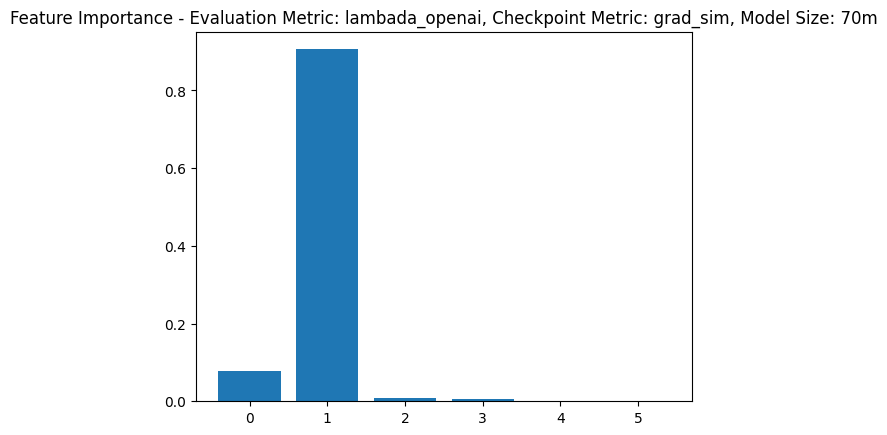

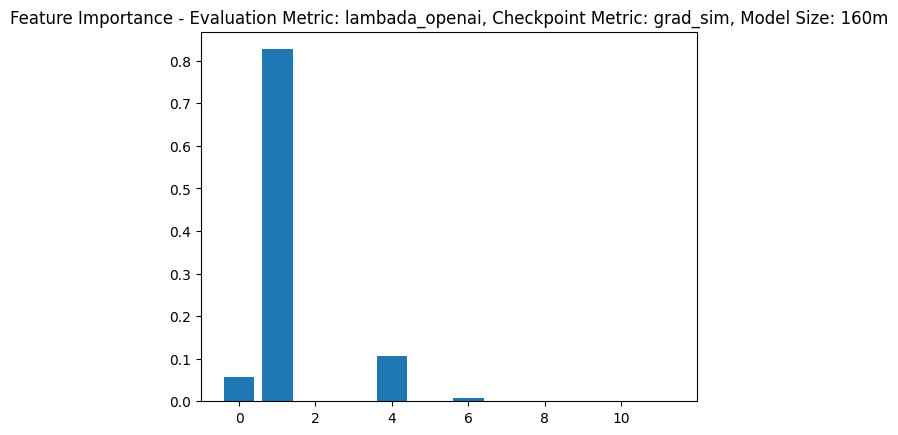

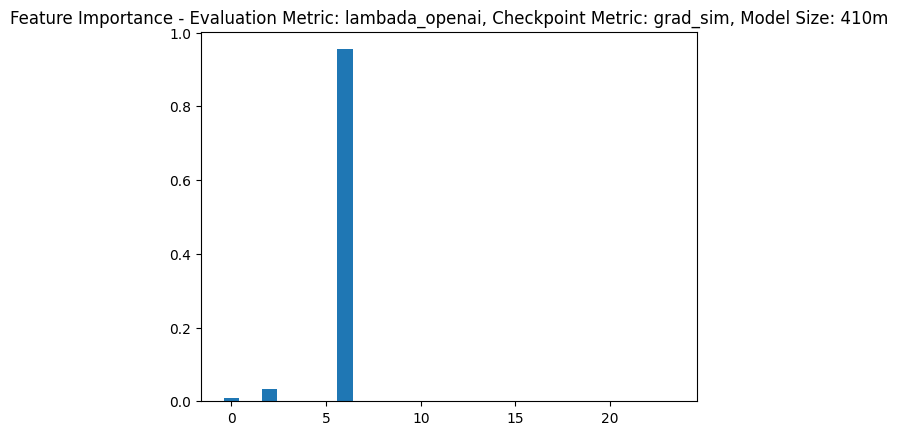

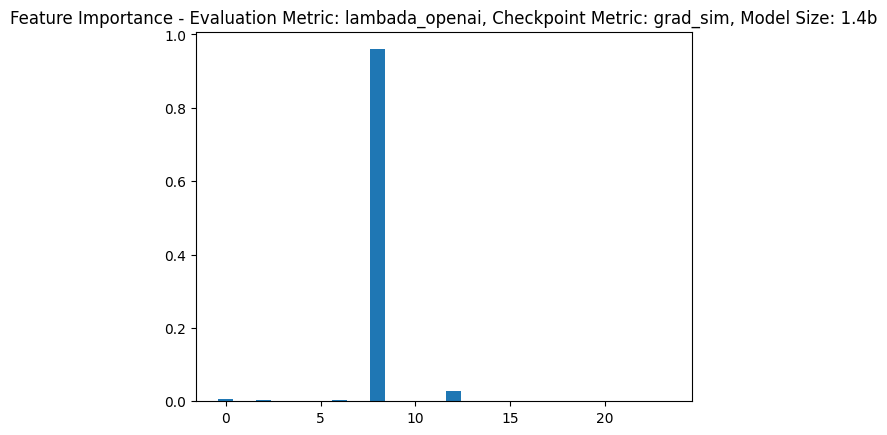

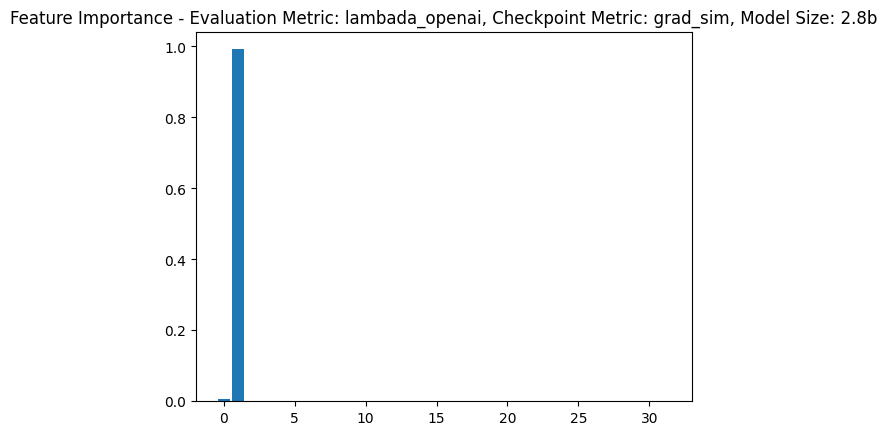

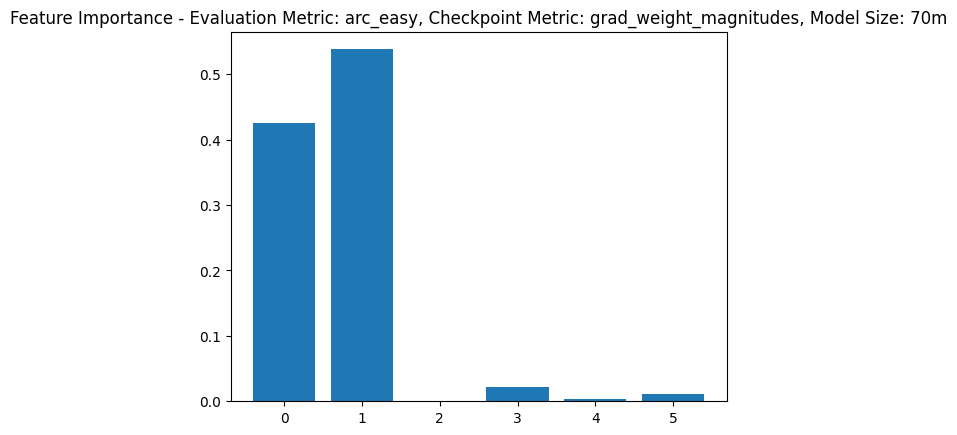

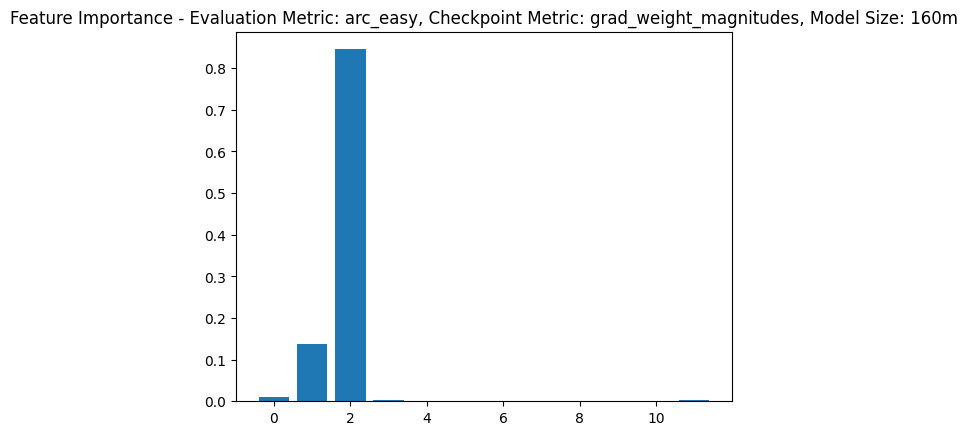

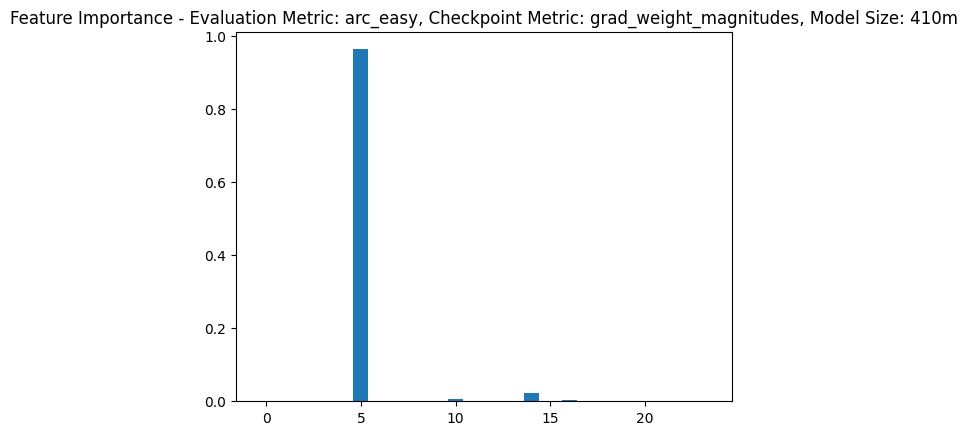

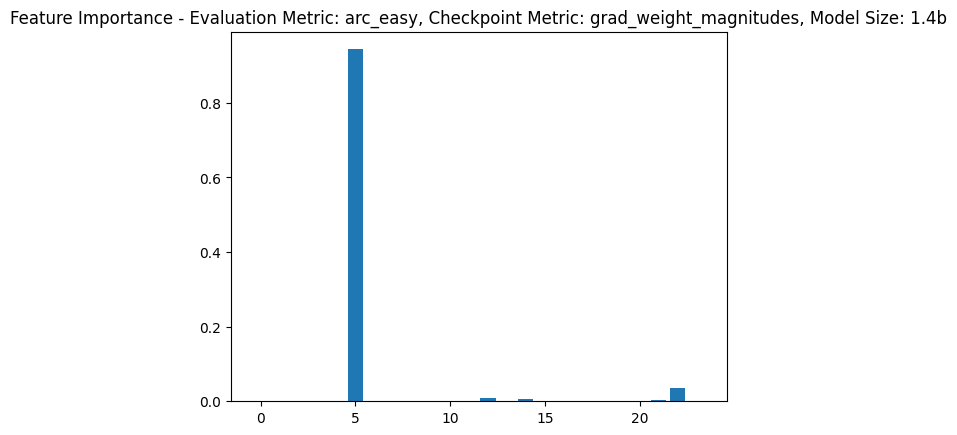

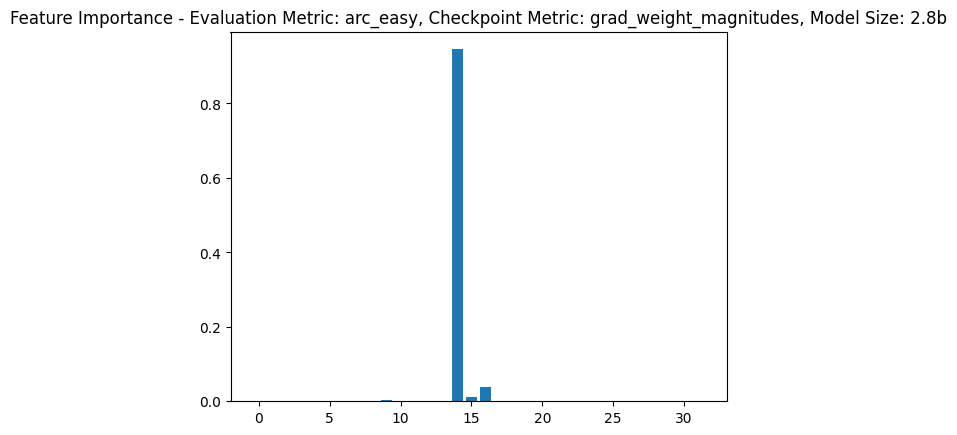

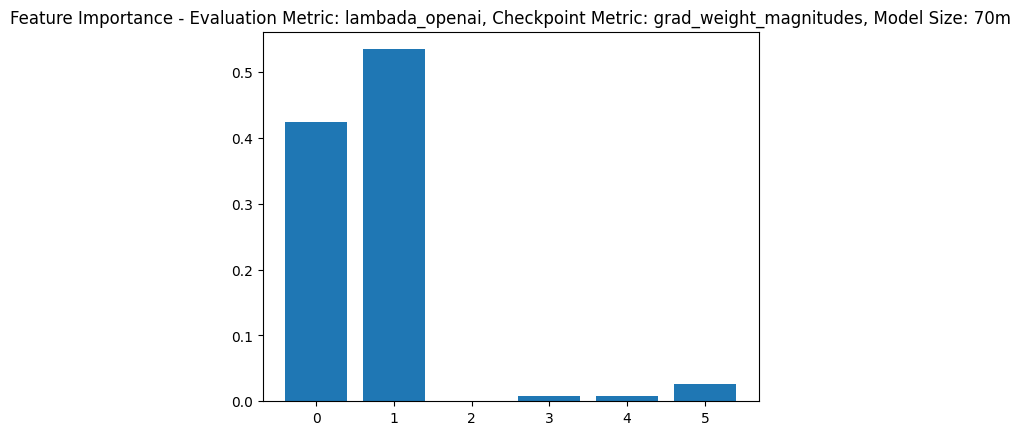

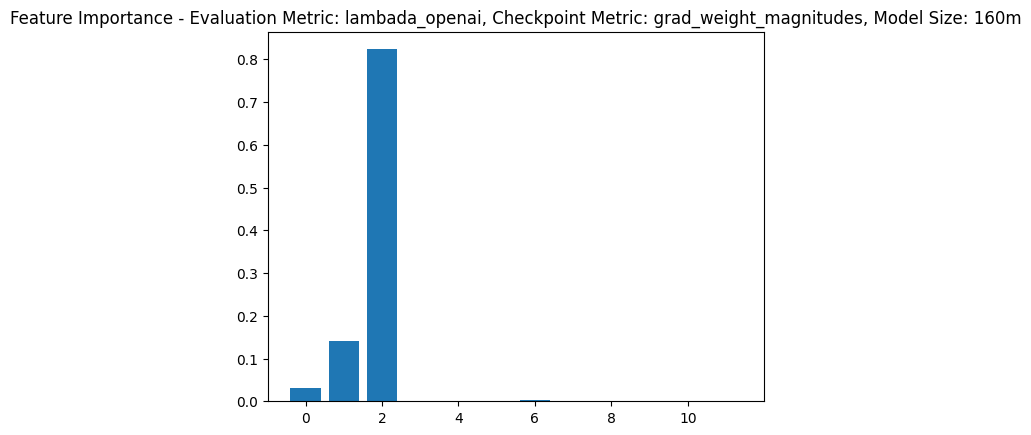

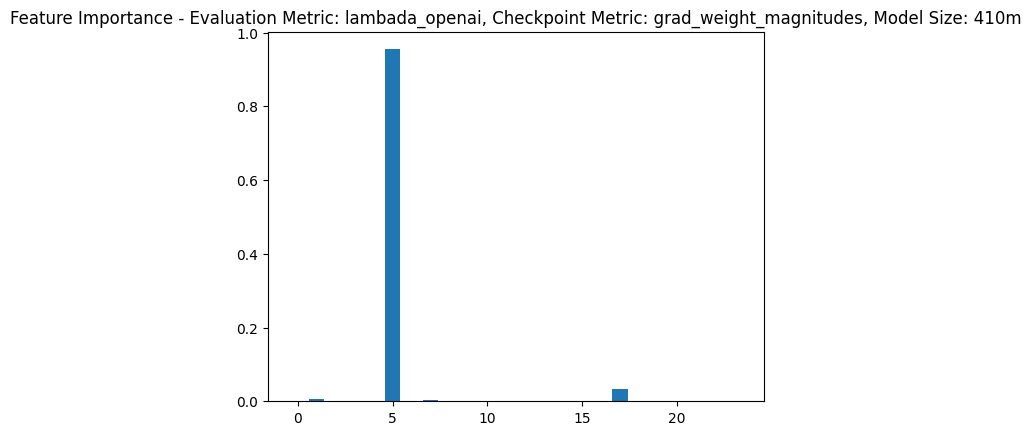

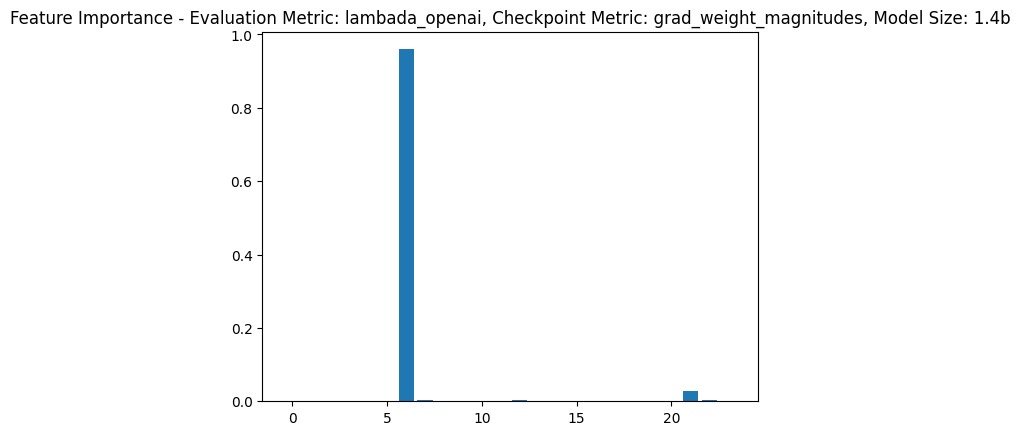

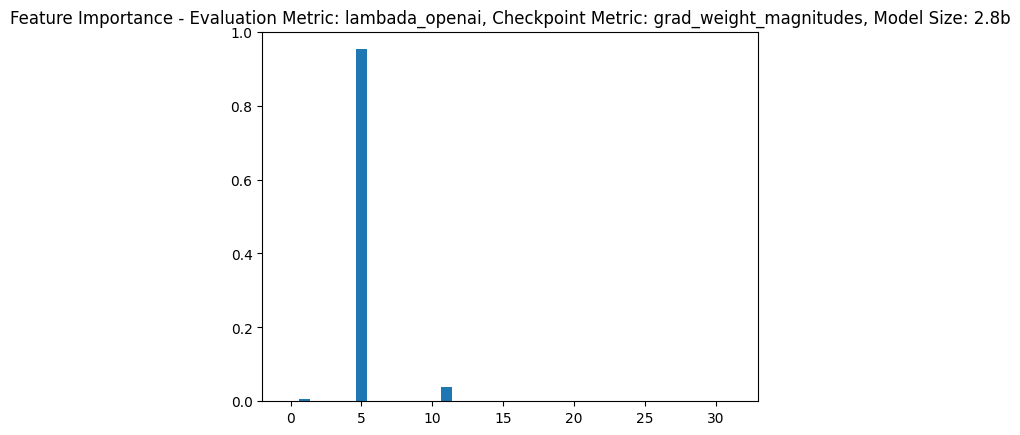

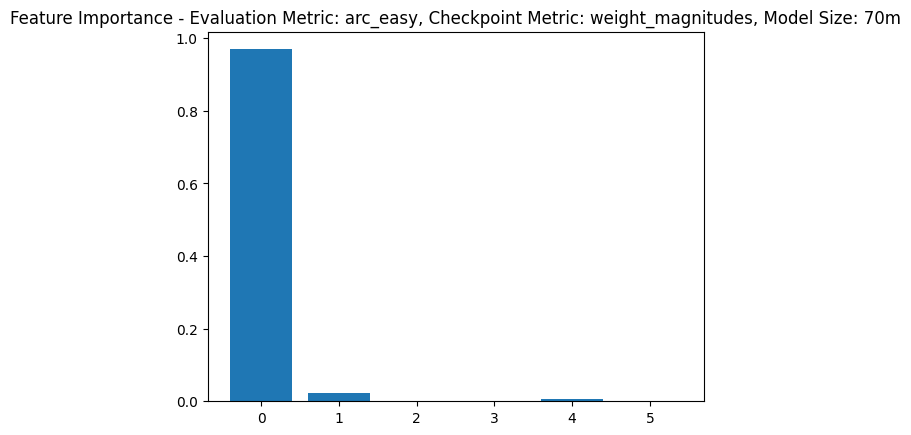

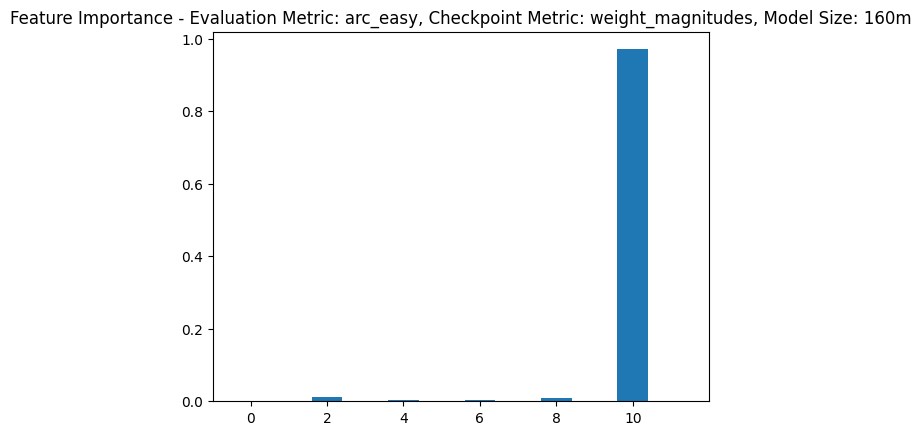

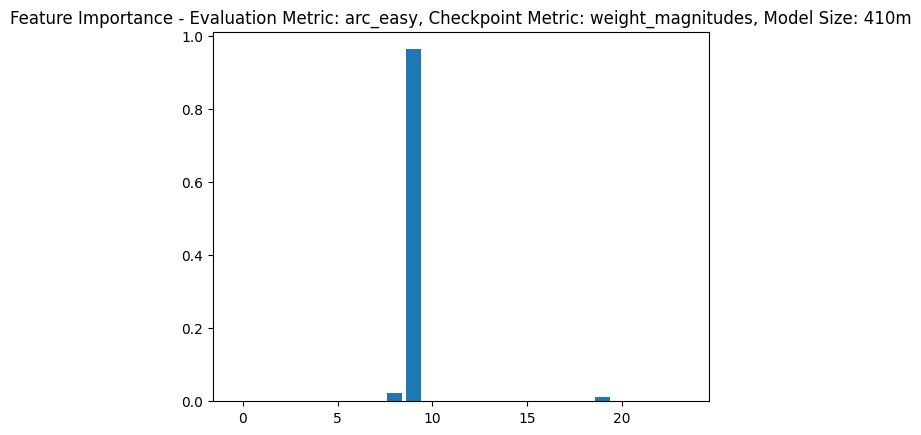

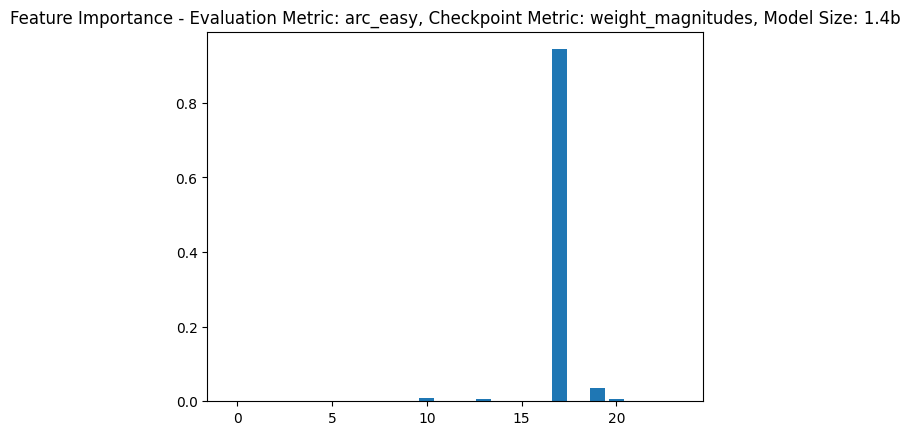

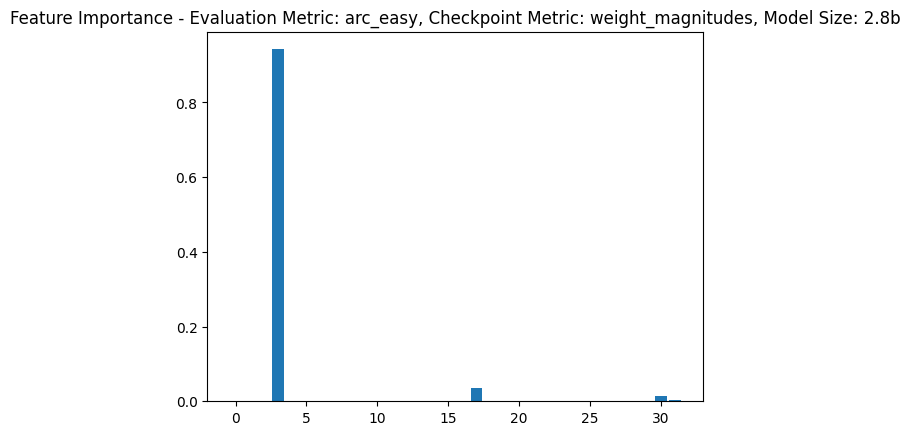

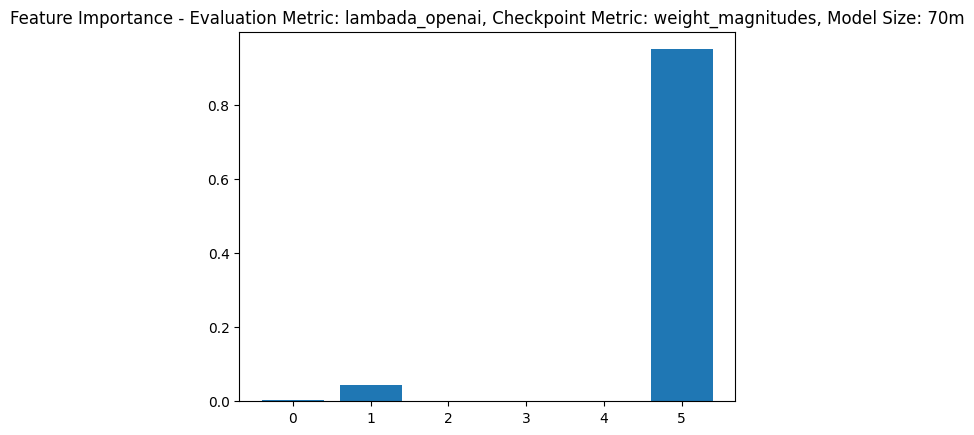

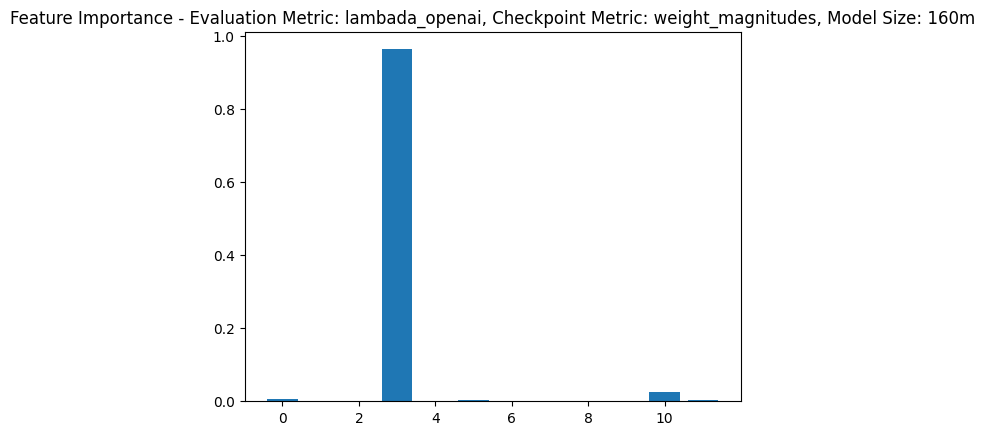

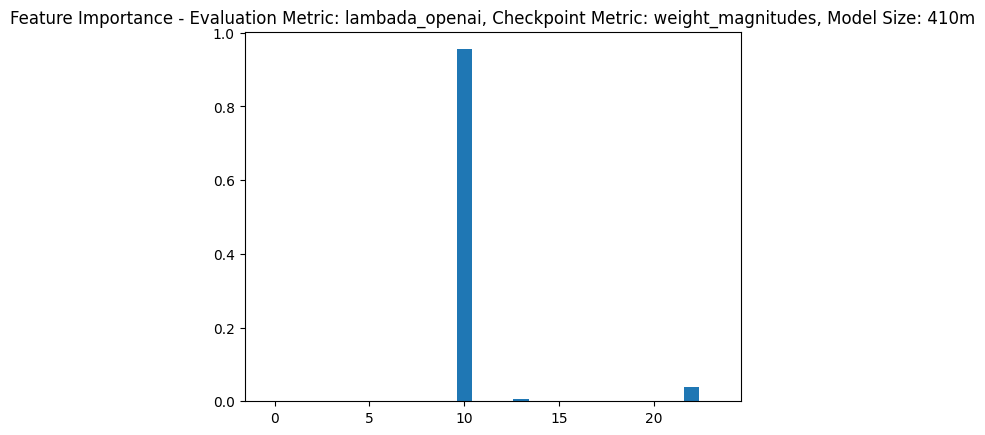

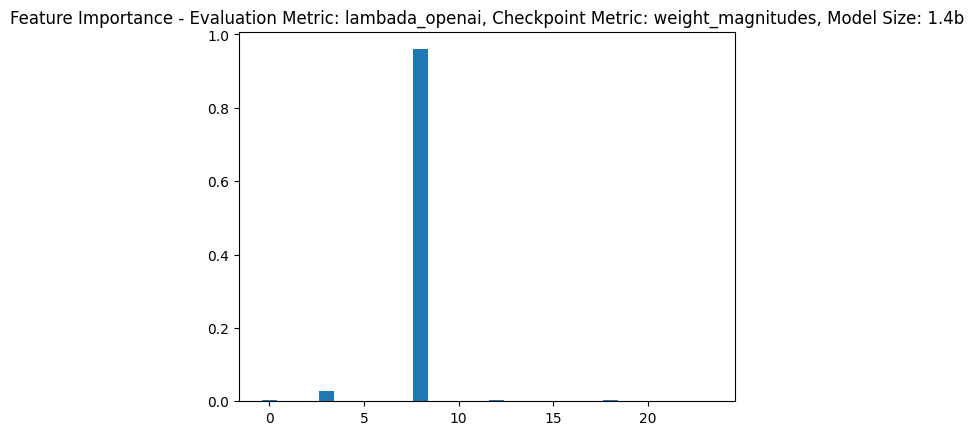

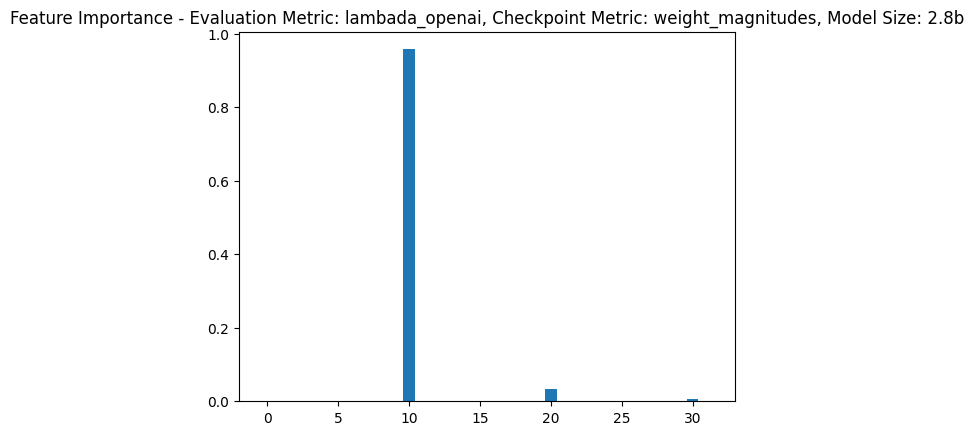

In [7]:
for metric_name in METRICS:
    for eval_name in LIMITED_EVAL_METRICS:
        for model_size in MODEL_SIZES:
            checkpoint_evals = get_checkpoint_evals(model_size)

            # NOTE: We want to map an evaluation -> layer metric 
            # unclear if we want to do this for all of the layers individually 

            # Reading in CKA scores per layer 
            with open(f'/home/rd654/pretraining-playground/computed_statistics/{model_size}/{metric_name}_per_layer.pkl', 'rb') as f:
                _metrics = pickle.load(f)
                metrics = sort_and_filter_metrics(_metrics, filter_layer_name="ov_circuit", remove_heads=True)

            feature_importance = defaultdict(list)

            Y = checkpoint_evals[eval_name]

            X = layer_metric_scores_zipped = list(zip(*metrics.values()))
            # List for each checkpoint of the layer metric scores

            # clf = tree.DecisionTreeRegressor(random_state=42)
            clf = tree.DecisionTreeRegressor()
            clf = clf.fit(X, Y)

            feature_importance = clf.feature_importances_

            # Plot out the feature importance
            plt.bar(range(len(feature_importance)), feature_importance)
            plt.title(f"Feature Importance - Evaluation Metric: {eval_name}, Checkpoint Metric: {metric_name}, Model Size: {model_size}")
            plt.show()


### Multivariate Analysis 

We can now perform the same analysis as above but this time we can group together all of the 
different feature variables into one combined feature space. I.e. combine the cka scores, grad scores, ...
into one long feature vector. 

In [15]:
METRICS

['cka_scores', 'grad_sim', 'grad_weight_magnitudes', 'weight_magnitudes']

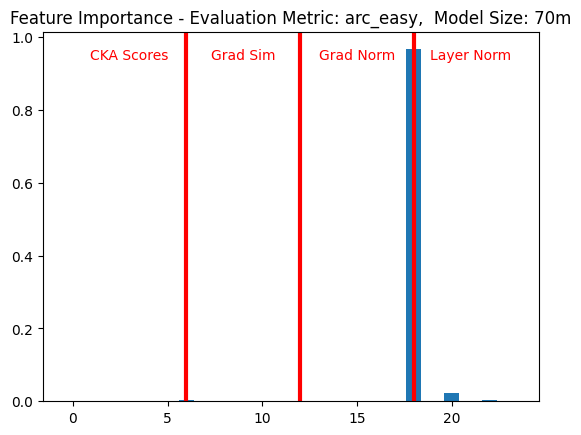

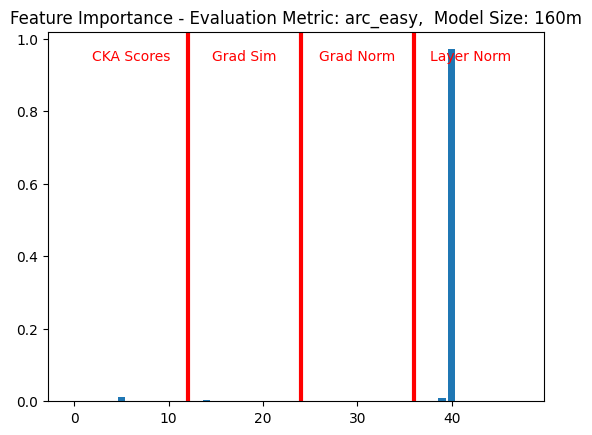

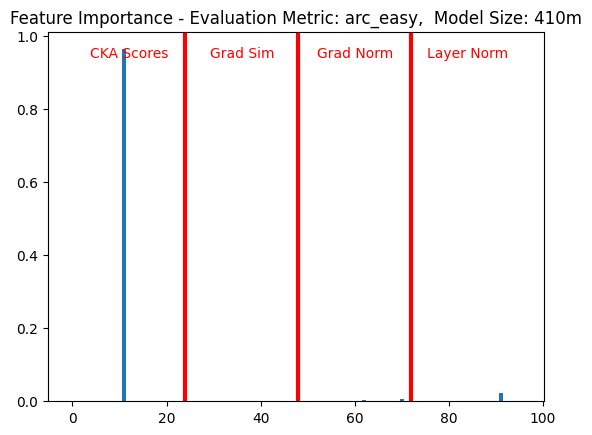

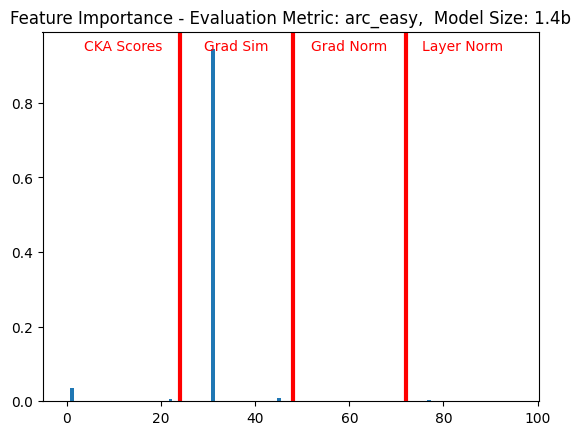

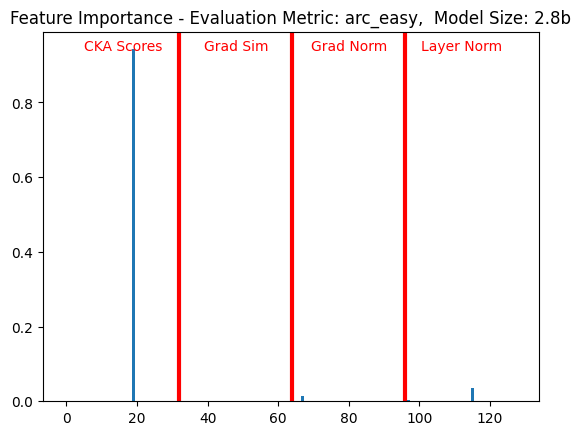

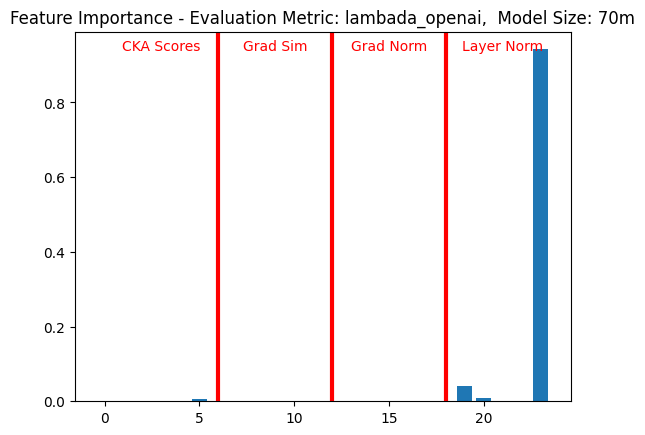

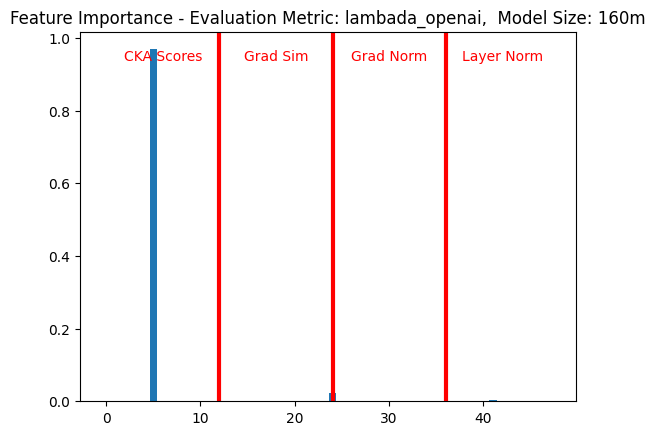

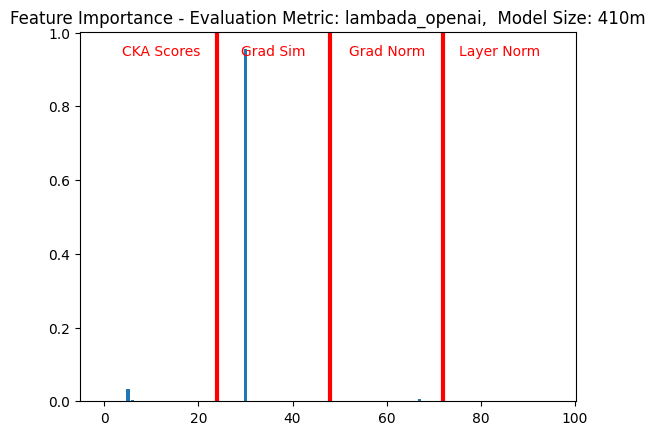

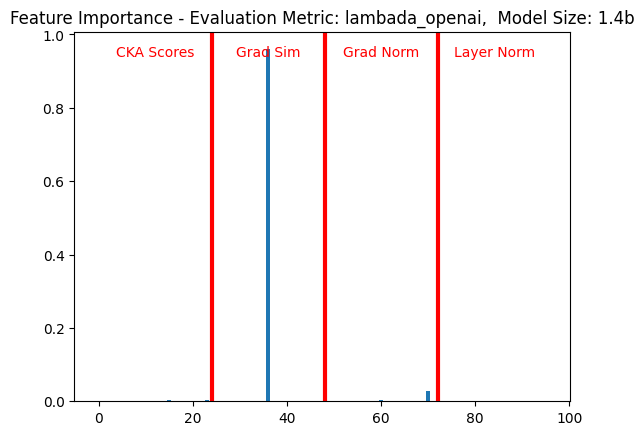

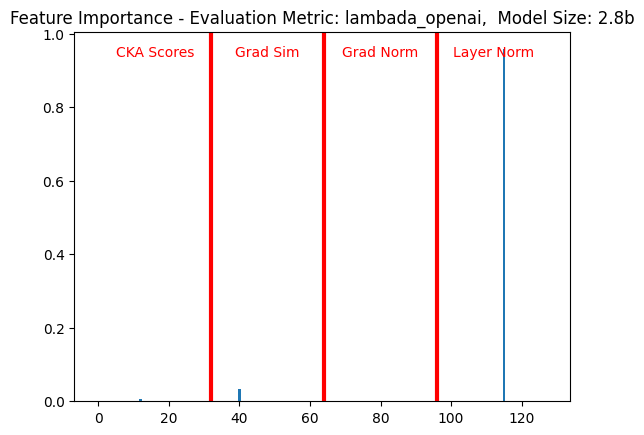

In [6]:
for eval_name in LIMITED_EVAL_METRICS:
    for model_size in MODEL_SIZES:
        checkpoint_evals = get_checkpoint_evals(model_size)
        X = []
        Y = checkpoint_evals[eval_name]

        for metric in METRICS:

            # NOTE: We want to map an evaluation -> layer metric 
            # unclear if we want to do this for all of the layers individually 

            # Reading in CKA scores per layer 
            with open(f'/home/rd654/pretraining-playground/computed_statistics/{model_size}/{metric}_per_layer.pkl', 'rb') as f:
                _metrics = pickle.load(f)
                metrics = sort_and_filter_metrics(_metrics, filter_layer_name="ov_circuit", remove_heads=True)


            curr_metrics = list(zip(*metrics.values()))

            if not X:
                X = curr_metrics
            else: 
                for i, metric in enumerate(curr_metrics):
                    X[i] += metric

            # List for each checkpoint of the layer metric scores


        clf = tree.DecisionTreeRegressor()
        clf = clf.fit(X, Y)

        feature_importance = clf.feature_importances_

        import matplotlib.pyplot as plt

        plt.bar(range(len(feature_importance)), feature_importance)


        # add label to first area - cka_scores 


        plt.axvline(x=len(feature_importance)/len(METRICS), color='red', linewidth=3)  # Add a red vertical line
        # add text to first area
        plt.text(len(feature_importance)/len(METRICS)/2, 0.95, 'CKA Scores', color='red', fontsize=10, ha='center', va='center')
        plt.axvline(x=2*len(feature_importance)/len(METRICS), color='red', linewidth=3)  # Add a red vertical line
        plt.text(3*len(feature_importance)/len(METRICS)/2, 0.95, 'Grad Sim', color='red', fontsize=10, ha='center', va='center')
        plt.axvline(x=3*len(feature_importance)/len(METRICS), color='red', linewidth=3)  # Add a red vertical line
        plt.text(5*len(feature_importance)/len(METRICS)/2, 0.95, 'Grad Norm', color='red', fontsize=10, ha='center', va='center')
        plt.text(7*len(feature_importance)/len(METRICS)/2, 0.95, 'Layer Norm', color='red', fontsize=10, ha='center', va='center')
        plt.title(f"Feature Importance - Evaluation Metric: {eval_name},  Model Size: {model_size}")
        plt.show()
